
# Задача: провести разведочный анализ данных, придумать продуктовые и технические гипотезы — какую ценность можете извлечь из данных для организации, которая предоставила данные

#### Создайте открытый репозиторий в github и приложите ссылку в поле для ответа. Ссылку нужно приложить сразу же, в тайминге тестирования. Добавить ссылку позже можно будет через тест по софтовым навыкам.

#### Пользуйтесь любым удобным инструментарием при решении задачи и опишите в README как решали задачу, чем пользовались при решении и как принимали решения

# Импортируем нужные библиотеки

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)

# Импортируем датасеты

# Общее описание `transaction_fraud_data.parquet`

Этот анонимизированный набор данных реальных финансовые транзакции, который предназначен для разработки и тестирования моделей выявления мошеннических операций.

Он охватывает различные сценарии — от розничной торговли и ресторанов до путешествий и здравоохранения — и включает как легитимные, так и мошеннические операции. В нём представлены важные признаки, влияющие на распознавание мошенничества: сумма, тип устройства, география, валюта, тип карты и метка `is_fraud`.

## Ключевые особенности

- **Разнообразие категорий**: Розница (онлайн и офлайн), рестораны (фастфуд и премиум), развлечения, здравоохранение, образование, топливо, путешествия и др.
- **География и валюта**: Транзакции охватывают разные страны, города и валюты, что позволяет моделировать глобальные риски.
- **Профили клиентов**: Для каждой транзакции предусмотрены данные о клиенте — возраст аккаунта, используемые устройства, типичные траты, уровень защиты от мошенничества.
- **Данные, готовые для ML**: Признаки включают скорость транзакций, риск вендора, присутствие карты, отпечатки устройств и другие факторы, помогающие обнаруживать подозрительные паттерны.

## Возможные применения

- Построение моделей выявления мошенничества.
- Анализ транзакционного поведения клиентов.
- Разработка и тестирование алгоритмов обнаружения аномалий.
- Изучение методов feature engineering, оценки моделей и оптимизации производительности в сфере финтеха и e-commerce.


# Содержание файла `transaction_fraud_data.parquet`

| Поле | Описание | Тип |
|------|----------|-----|
| `transaction_id` | Уникальный идентификатор транзакции | String |
| `customer_id` | Уникальный идентификатор клиента | String |
| `card_number` | Маскированный номер карты | Int64 |
| `timestamp` | Дата и время транзакции | Datetime(time_unit='us') |
| `vendor_category` | Общая категория вендора (например, Розница, Путешествия) | String |
| `vendor_type` | Тип вендора внутри категории (например, "онлайн") | String |
| `vendor` | Название вендора | String |
| `amount` | Сумма транзакции | Float64 |
| `currency` | Валюта (например, USD, EUR, JPY) | String |
| `country` | Страна, где проведена транзакция | String |
| `city` | Город, где проведена транзакция | String |
| `city_size` | Размер города (например, средний, крупный) | String |
| `card_type` | Тип карты (например, Basic Credit, Gold Credit) | String |
| `is_card_present` | Присутствовала ли карта физически при оплате (POS) | Boolean |
| `device` | Устройство, с которого проведена транзакция (например, Chrome, iOS App) | String |
| `channel` | Канал проведения транзакции (веб, мобильный, POS) | String |
| `device_fingerprint` | Уникальный отпечаток устройства | String |
| `ip_address` | IP-адрес транзакции | String |
| `is_outside_home_country` | Признак того, что операция проведена вне страны клиента | Boolean |
| `is_high_risk_vendor` | Является ли категория вендора рискованной (например, Путешествия, Развлечения) | Boolean |
| `is_weekend` | Произошла ли операция в выходной день | Boolean |
| `last_hour_activity` | Показатели активности за последний час в виде вложенной структуры | Struct({'num_transactions': Int64, 'total_amount': Float64, 'unique_merchants': Int64, 'unique_countries': Int64, 'max_single_amount': Float64}) |
| `is_fraud` | Является ли транзакция мошеннической (`True` / `False`) | Boolean |

Составное поле `last_hour_activity`:

| Ключ | Описание | Тип |
|------|----------|-----|
| `num_transactions` | Количество транзакций | Int64 |
| `total_amount` | Общая сумма транзакций | Float64 |
| `unique_merchants` | Число уникальных продавцов | Int64 |
| `unique_countries` | Число уникальных стран | Int64 |
| `max_single_amount` | Максимальная сумма одной транзакции | Float64 |


# Содержание файла `historical_currency_exchange.parquet`

Вспомогательные данные для перевода операций в нужную валюту.

Обменный курс с `2024-09-30` по `2024-10-30` относительно `USD`.

| Поле | Описание | Тип |
|------|----------|-----|
| `date` | Дата обменного курса | Date |
| `AUD` | Австралийский доллар | Float64 |
| `BRL` | Бразильский реал | Float64 |
| `CAD` | Канадский доллар | Float64 |
| `EUR` | Евро | Float64 |
| `GBP` | Британский фунт стерлингов | Float64 |
| `JPY` | Японская иена | Float64 |
| `MXN` | Мексиканское песо | Float64 |
| `NGN` | Нигерийская найра | Float64 |
| `RUB` | Российский Рубль | Float64 |
| `SGD` | Сингапурский доллар | Float64 |
| `USD` | Доллар США | Int64 |

data shape: (7483766, 23)
currency_exchange shape: (31, 12)


,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,city,city_size,card_type,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud
6945146,TX_b62ff64c,CUST_54862,4527474388613880,2024-10-28 18:33:18.230159,Grocery,online,Amazon Fresh,337.01,EUR,France,Unknown City,medium,Basic Credit,False,Edge,web,cafcee2d878e0fd0d78ad0c4fa283a0d,35.107.228.146,False,False,False,"{'num_transactions': 119, 'total_amount': 1571...",False
4886971,TX_9daf7896,CUST_31477,379472774363059,2024-10-20 07:32:28.438910,Travel,hotels,Westin,3904.38,BRL,Brazil,Unknown City,medium,Premium Debit,False,Firefox,web,ba24a344eaac2646e0e9123a01dfb0ca,96.162.98.37,False,True,True,"{'num_transactions': 279, 'total_amount': 6077...",False
1209844,TX_f29ae004,CUST_79378,6943942556223337,2024-10-05 00:21:36.463228,Healthcare,medical,Lab Corp,456.05,USD,USA,Los Angeles,large,Premium Debit,False,iOS App,mobile,85ce7e0dfd2f242d02c96fa88148adac,122.241.112.177,True,False,True,"{'num_transactions': 955, 'total_amount': 5358...",False


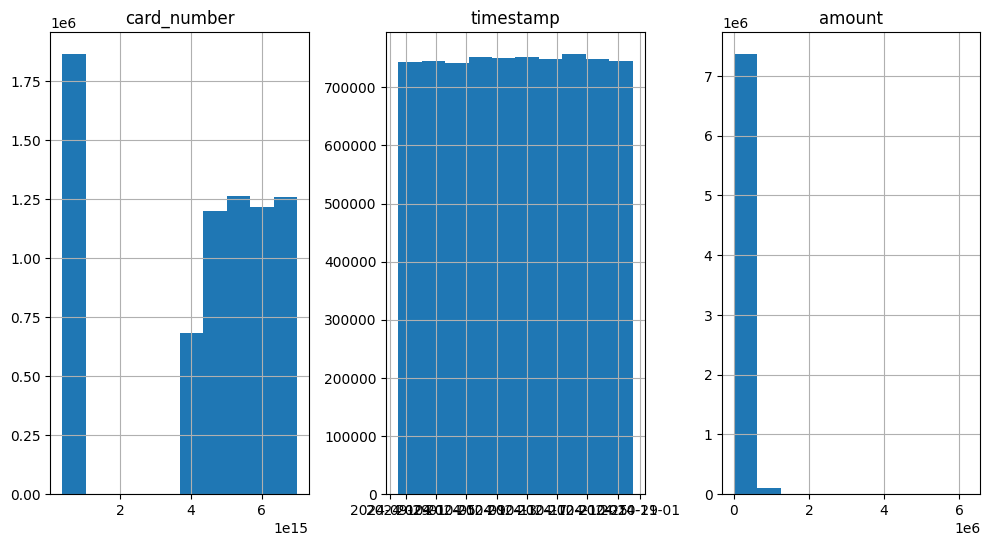

In [3]:
data = pd.read_parquet('/content/drive/MyDrive/AI Talent Hub - Free EDA/data/transaction_fraud_data.parquet')
currency_exchange = pd.read_parquet('/content/drive/MyDrive/AI Talent Hub - Free EDA/data/historical_currency_exchange.parquet')
print(f'data shape: {data.shape}')
print(f'currency_exchange shape: {currency_exchange.shape}')
data.hist(figsize=(25, 6), layout=(-1, 6))
data.sample(3)

In [5]:
gc.collect()

0

# Exercises

In [6]:
# 1. доля мошеннических транзакций
total_transactions = len(data)
fraud_transactions = data['is_fraud'].sum()
fraud_ratio = np.ceil((fraud_transactions / total_transactions) * 10) / 10  # округление вверх до 1 знака
answer_1 = f"{fraud_ratio:.1f}"
print(answer_1)

0.2


In [7]:
# 2. топ-5 стран по количеству мошеннических транзакций
fraud_by_country = data[data['is_fraud'] == True]['country'].value_counts().head(5)
answer_2 = ','.join(fraud_by_country.index)
print(answer_2)

Russia,Mexico,Brazil,Nigeria,Australia


In [8]:
# 3. доля мошенничества среди транзакций у продавцов с высоким риском
high_risk_data = data[data['is_high_risk_vendor'] == True]
fraud_ratio_high_risk = len(high_risk_data[high_risk_data['is_fraud'] == True]) / len(high_risk_data)
fraud_ratio_high_risk_rounded = np.ceil(fraud_ratio_high_risk * 10) / 10
print(f"{fraud_ratio_high_risk_rounded:.1f}")

0.2


In [9]:
# 4. среднее количество транзакций одного клиента за час
data['hour'] = pd.to_datetime(data['timestamp']).dt.floor('h')
client_hour_counts = data.groupby(['customer_id', 'hour']).size()
avg_transactions_per_client_per_hour = client_hour_counts.mean()
avg_transactions_per_client_per_hour_rounded = np.ceil(avg_transactions_per_client_per_hour * 100) / 100
print(f"{avg_transactions_per_client_per_hour_rounded:.2f}")

2.46


In [10]:
# 5. город с наибольшей средней суммой транзакций
avg_amount_by_city = data.groupby('city')['amount'].mean()
city_with_highest_avg = avg_amount_by_city.idxmax()
print(city_with_highest_avg)

Unknown City


In [11]:
avg_amount_by_city.sort_values(ascending=False)

,amount
city,
Unknown City,51315.780071
New York,568.872467
San Antonio,567.921894
San Jose,567.263760
Phoenix,565.730142
San Diego,565.593140
Chicago,565.277374
Houston,564.961388
Los Angeles,563.900769


In [12]:
# 6. город с highest средним чеком по операциям fast_food
fast_food_data = data[data['vendor_type'] == 'fast_food']
avg_amount_fast_food_by_city = fast_food_data.groupby('city')['amount'].mean()
city_with_highest_fast_food_avg = avg_amount_fast_food_by_city.idxmax()
print(city_with_highest_fast_food_avg)

Unknown City


In [13]:
avg_amount_fast_food_by_city.sort_values(ascending=False)

,amount
city,
Unknown City,15214.407916
Chicago,264.450281
New York,263.296441
San Antonio,258.169691
Los Angeles,255.950324
San Diego,254.343884
Dallas,248.685716
San Jose,247.892502
Houston,246.913137


In [14]:
avg_amount_fast_food_by_city.sort_values(ascending=False)

,amount
city,
Unknown City,15214.407916
Chicago,264.450281
New York,263.296441
San Antonio,258.169691
Los Angeles,255.950324
San Diego,254.343884
Dallas,248.685716
San Jose,247.892502
Houston,246.913137


In [15]:
# 7. среднее для всех немошеннических операций в USD
exchange_rates_melted = currency_exchange.melt(id_vars=['date'], var_name='currency', value_name='rate')
exchange_rates_melted['date'] = pd.to_datetime(exchange_rates_melted['date'])

# подготовка данных для конвертации в USD
data['date'] = pd.to_datetime(data['timestamp']).dt.normalize()  # Преобразуем к datetime без времени
exchange_rates_melted['date'] = exchange_rates_melted['date'].dt.normalize()  # Преобразуем к datetime без времени
data_with_rates = data.merge(exchange_rates_melted, on=['date', 'currency'], how='left')

# расчет суммы в баксы
data_with_rates['amount_usd'] = data_with_rates['amount'] / data_with_rates['rate']

non_fraud_avg = data_with_rates[data_with_rates['is_fraud'] == False]['amount_usd'].mean()
non_fraud_avg_rounded = int(np.ceil(non_fraud_avg))
print(non_fraud_avg_rounded)

460


In [16]:
# 8. среднеквадратичное отклонение для всех немошеннических операций в баксах
non_fraud_std = data_with_rates[data_with_rates['is_fraud'] == False]['amount_usd'].std()
non_fraud_std_rounded = int(np.ceil(non_fraud_std))
print(non_fraud_std_rounded)

418


In [17]:
# 9. среднее для всех мошеннических операций в баксах
fraud_avg = data_with_rates[data_with_rates['is_fraud'] == True]['amount_usd'].mean()
fraud_avg_rounded = int(np.ceil(fraud_avg))
print(fraud_avg_rounded)

875


In [18]:
# 10. среднеквадратичное отклонение для всех мошеннических операций в баксах
fraud_std = data_with_rates[data_with_rates['is_fraud'] == True]['amount_usd'].std()
fraud_std_rounded = int(np.ceil(fraud_std))
print(fraud_std_rounded)

1350


In [19]:
# 11. клиенты с потенциально опасным поведением
data['unique_merchants'] = data['last_hour_activity'].apply(lambda x: x['unique_merchants']) # извлечение значения unique_merchants из структуры last_hour_activity
client_median_unique_merchants = data.groupby('customer_id')['unique_merchants'].median()
quantile_95 = client_median_unique_merchants.quantile(0.95)
dangerous_clients_count = len(client_median_unique_merchants[client_median_unique_merchants > quantile_95])
print(dangerous_clients_count)

229


# Free EDA

In [20]:
data.sample(3)

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,city,city_size,card_type,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud,hour,date,unique_merchants
1567812,TX_8d0d248c,CUST_47585,5980582391398237,2024-10-06 12:40:18.889216,Retail,physical,Nike Store,2048.27,AUD,Australia,Unknown City,medium,Platinum Credit,False,Edge,web,84bf6edfc7a6640c21ede85b5c5c93a0,72.44.59.253,True,False,True,"{'num_transactions': 1164, 'total_amount': 502...",False,2024-10-06 12:00:00,2024-10-06,105
2988466,TX_c550c759,CUST_96447,370514477318846,2024-10-12 10:10:54.577728,Restaurant,premium,Capital Grille,616.70,EUR,France,Unknown City,medium,Platinum Credit,False,Safari,web,28b83ced5f0d211587b2845890dad2a1,11.54.137.63,True,False,True,"{'num_transactions': 366, 'total_amount': 2412...",False,2024-10-12 10:00:00,2024-10-12,102
6324299,TX_03f5f79f,CUST_58432,6325558226262162,2024-10-26 05:52:14.447875,Retail,online,Amazon,723.68,EUR,France,Unknown City,medium,Gold Credit,False,Android App,mobile,f76af84148780a84ff2010c11b99a4ed,29.82.208.74,False,False,True,"{'num_transactions': 152, 'total_amount': 1349...",False,2024-10-26 05:00:00,2024-10-26,82


# Гипотеза 1.
## Предположим, что мошенничество чаще всего происходит в ночное время
Чтобы убедиться в этом, для этого необходимо оценить соотношение совершенных актов мошенничества в ночное и неночное время суток и сравнить полученные результаты и провести т-тест

In [49]:
data['hour'] = pd.to_datetime(data['timestamp']).dt.hour

In [50]:
hours_of_fraud = data.loc[data['is_fraud'] == True, 'timestamp'].dt.hour

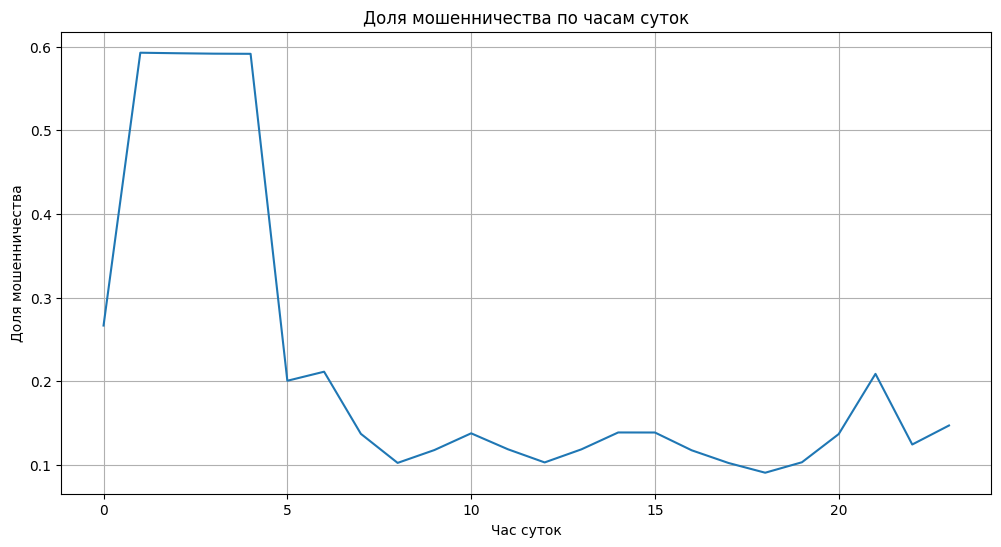

In [53]:
# группировка по времени суток
hours_of_fraud_grouped = data.groupby('hour')['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
hours_of_fraud_grouped.columns = ['hour', 'total_transactions', 'fraud_count', 'fraud_rate']

# визуализация
plt.figure(figsize=(12, 6))
plt.plot(hours_of_fraud_grouped['hour'], hours_of_fraud_grouped['fraud_rate'])
plt.xlabel('Час суток')
plt.ylabel('Доля мошенничества')
plt.title('Доля мошенничества по часам суток')
plt.grid(True)
plt.show()

In [54]:
# за ночь возьмем время, в которое люди обычно спят
def part_of_day(s):
    if (0 <= s <= 5) or (22 <= s <= 23):
        return 'night'
    elif 6 <= s <= 11:
        return 'morning'
    elif 12 <= s <= 16:
        return 'afternoon'
    elif 17 <= s <= 21:
        return 'evening'

hours_of_fraud.apply(part_of_day)

,timestamp
1,night
4,night
5,night
9,night
13,night
...,...
7483747,night
7483751,night
7483753,night
7483754,night


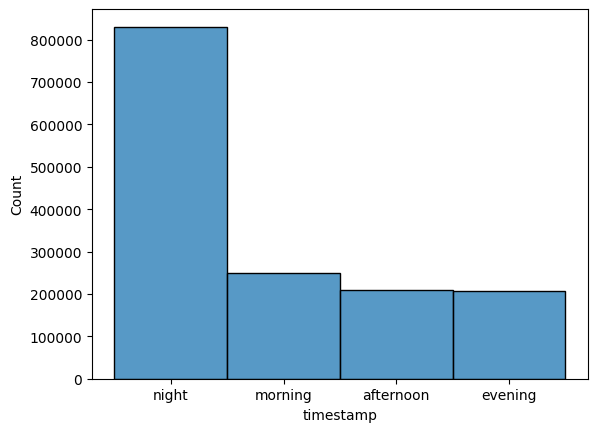

In [55]:
sns.histplot(hours_of_fraud.apply(part_of_day));

Как видно из графика, в действительности, в ночное время чаще всего совершаются мошеннические операции.

Теперь проведем статистический тест (t-test между "ночными" и "дневными" часами)

In [56]:
# Статистический тест (t-test между "ночными" и "дневными" часами)
night_hours = data[data['hour'].isin([0, 1, 2, 3, 4, 5, 22, 23])]['is_fraud']
day_hours = data[data['hour'].isin([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])]['is_fraud']

In [57]:
t_stat, p_value = stats.ttest_ind(night_hours, day_hours)
print(f"T-статистика: {t_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Гипотеза подтверждена: есть статистически значимая разница между ночью и днем")
else:
    print("Гипотеза не подтверждена: нет статистически значимой разницы")

T-статистика: 877.4892
P-значение: 0.0000
Гипотеза подтверждена: есть статистически значимая разница между ночью и днем


# Гипотеза 2
## Выдвинем также еще одну гипотезу, говорящую, что мошенничество связано с транзакциями вне страны клиента
Для работы с данной гипотезой, взглянем на количество мошеннических операций в/вне страны клиента, так же сравним и сделаем статистическое тестирование

In [27]:
# анализ признака is_outside_home_country
fraud_by_location = data.groupby('is_outside_home_country')['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
fraud_by_location.columns = ['outside_home_country', 'total_transactions', 'fraud_count', 'fraud_rate']

print("Анализ мошенничества по признаку 'вне страны клиента':")
print(fraud_by_location)

Анализ мошенничества по признаку 'вне страны клиента':
   outside_home_country  total_transactions  fraud_count  fraud_rate
0                 False             5073605       126343    0.024902
1                  True             2410161      1368376    0.567753


Text(0.5, 1.0, 'Доля мошенничества по географическому признаку')

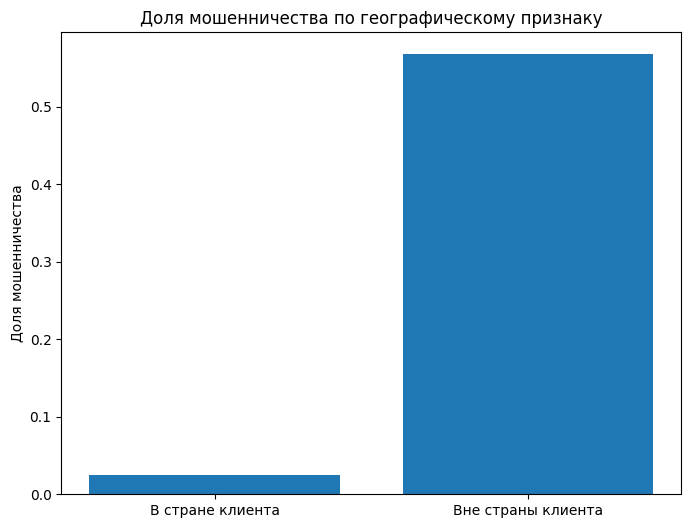

In [28]:
# провизуализируем
plt.figure(figsize=(8, 6))
bars = plt.bar(['В стране клиента', 'Вне страны клиента'], fraud_by_location['fraud_rate'])
plt.ylabel('Доля мошенничества')
plt.title('Доля мошенничества по географическому признаку')

Видим значимое различие между долями мошенничсевта по географическому признаку

Проведем т-тест:

In [29]:
# Статистический тест
inside_data = data[data['is_outside_home_country'] == False]['is_fraud']
outside_data = data[data['is_outside_home_country'] == True]['is_fraud']

t_stat, p_value = stats.ttest_ind(inside_data, outside_data)
print(f"\nT-тест для географического признака:")
print(f"T-статистика: {t_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

odds_ratio = (fraud_by_location.iloc[1]['fraud_rate'] / (1 - fraud_by_location.iloc[1]['fraud_rate'])) / \
             (fraud_by_location.iloc[0]['fraud_rate'] / (1 - fraud_by_location.iloc[0]['fraud_rate']))

print(f"Отношение шансов (вне страны / в стране): {odds_ratio:.2f}")


T-тест для географического признака:
T-статистика: -2245.4743
P-значение: 0.0000
Отношение шансов (вне страны / в стране): 51.43


Видим значим ые разлчия между двумя выборками, что позволяет отклонить нулевую гипотезу, которая говорит, что мошенничество не связано с транзакциями вне страны клиента.

# Гипотеза 3.
## Выдвину и проверю третью гипотезу, подразумевающую, что мошенничество коррелирует с высокой активностью за последний час

In [30]:
# извлечем признаки из структуры last_hour_activity
data['last_hour_transactions'] = data['last_hour_activity'].apply(lambda x: x['num_transactions'] if x else 0)
data['last_hour_amount'] = data['last_hour_activity'].apply(lambda x: x['total_amount'] if x else 0)
data['last_hour_unique_merchants'] = data['last_hour_activity'].apply(lambda x: x['unique_merchants'] if x else 0)
data['last_hour_max_amount'] = data['last_hour_activity'].apply(lambda x: x['max_single_amount'] if x else 0)

# проведем корреляционный анализ
correlation_data = data[['is_fraud', 'last_hour_transactions', 'last_hour_amount',
                        'last_hour_unique_merchants', 'last_hour_max_amount']].corr()

print("Корреляция признаков активности с мошенничеством:")
print(correlation_data['is_fraud'].sort_values(ascending=False))

Корреляция признаков активности с мошенничеством:
is_fraud                      1.000000
last_hour_max_amount          0.009226
last_hour_unique_merchants    0.006932
last_hour_transactions        0.004506
last_hour_amount              0.003332
Name: is_fraud, dtype: float64


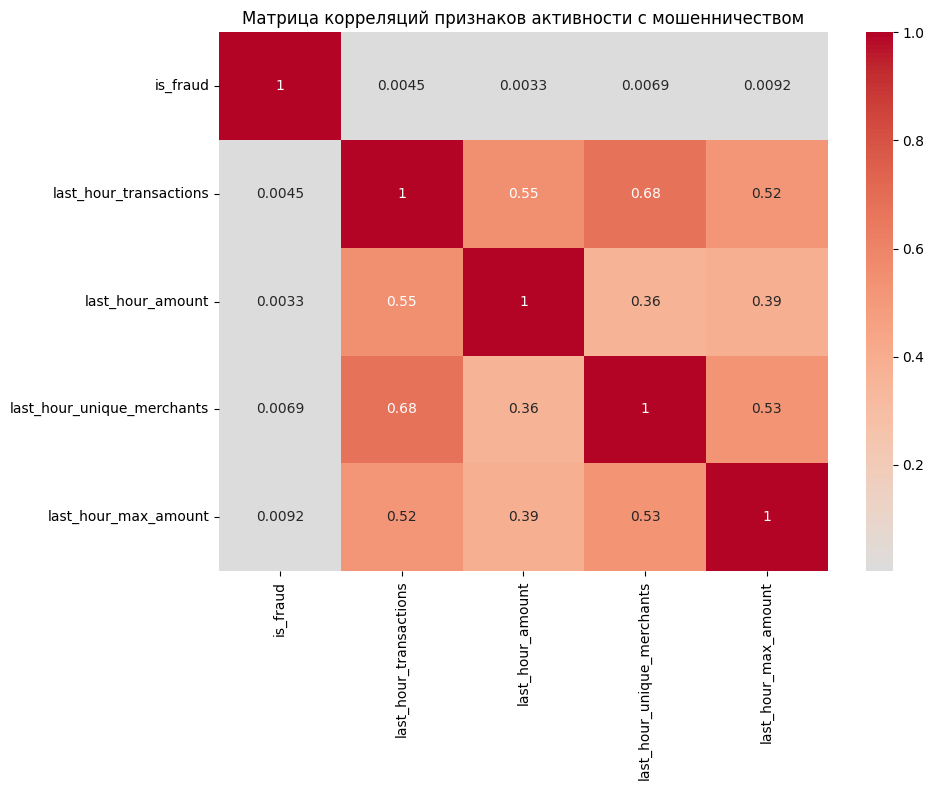

In [31]:
# Выведем это с помощью графика хитмап
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций признаков активности с мошенничеством')
plt.tight_layout()
plt.show()

In [32]:
# сравнение средних значений для мошеннических и нормальных транзакций
activity_comparison = data.groupby('is_fraud')[['last_hour_transactions', 'last_hour_unique_merchants']].mean()
print("\nСредние значения активности:")
print(activity_comparison)


Средние значения активности:
          last_hour_transactions  last_hour_unique_merchants
is_fraud                                                    
False                 408.262533                   79.916723
True                  412.670479                   80.445120


На основе проведенного выше анализа видим, что мошенничество не коррелирует с высокой активностью за последний час, что позволяет отклонить гипотезу

# Подведение итогов
## Мною было выдвинуто три гипотезы, из которых две оказались статистически значимыми:
- Мошенничество связано с транзакциями вне страны клиента
- Мошенничество чаще всего происходит в ночное время
## В свою очередь, не подтвердилась третья гипотеза что позволяет сказать:
- Мошенничество НЕ коррелирует с высокой активностью за последний час

# Что можно предложить на основе полученных результатов?
1. **Усилить мониторинг** ночных транзакций
2. **Реализовать дополнительную проверку** для транзакций вне страны клиента
3. **Исключить** признаки активности за последний час из модели предсказания (из-за слабой корреляции)